### Goal: exploration of the dataframe, understand the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [3]:
DATASET_BEERADVOCATE = 'DATA/BeerAdvocate/'
DATASET_MATCHEDBEER = 'DATA/matched_beer_data/'
DATASET_RATEBEER = 'DATA/RateBeer/'

In [4]:
df_adv_beer = pd.read_csv(DATASET_BEERADVOCATE + 'beers.csv')
df_adv_breweries = pd.read_csv(DATASET_BEERADVOCATE + 'breweries.csv')
df_adv_users = pd.read_csv(DATASET_BEERADVOCATE + 'users.csv')

print('shape of all datasets: \n',
     'beer',df_adv_beer.shape,'\n',
      'users',df_adv_users.shape,'\n',
     'breweries',df_adv_breweries.shape)

shape of all datasets: 
 beer (280823, 15) 
 users (153704, 6) 
 breweries (16758, 4)


## Exploration of the datasets
### Adv Beer

In [5]:
df_adv_beer.sample(5)

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
254271,232029,Sassafras Flower Pale Ale,31049,Scratch Brewing Company,Herbed / Spiced Beer,1,0,4.25,NaN,NaN,5.1,4.250000,NaN,0,NaN
249099,200489,Brewer's Cut Blackberry Saison,458,Real Ale Brewing Company,Saison / Farmhouse Ale,24,4,3.87,85.0,NaN,6.5,3.683750,-0.599835,4,3.93
43858,70293,India Brown Ale,17998,Brasserie Trois Dames,American Brown Ale,7,4,3.58,NaN,NaN,5.3,3.505714,NaN,0,NaN
220758,275653,Strong Like Bull,44038,Birdfish Brewing Company,American Double / Imperial IPA,0,0,NaN,NaN,NaN,10.5,NaN,NaN,0,NaN
107683,112070,Belgian Dubbel,31030,Populuxe Brewing,Dubbel,1,1,3.70,NaN,NaN,6.9,3.700000,-0.346446,1,3.70


In [6]:
df_adv_beer.dtypes.value_counts()

float64    7
int64      5
object     3
dtype: int64

<AxesSubplot:>

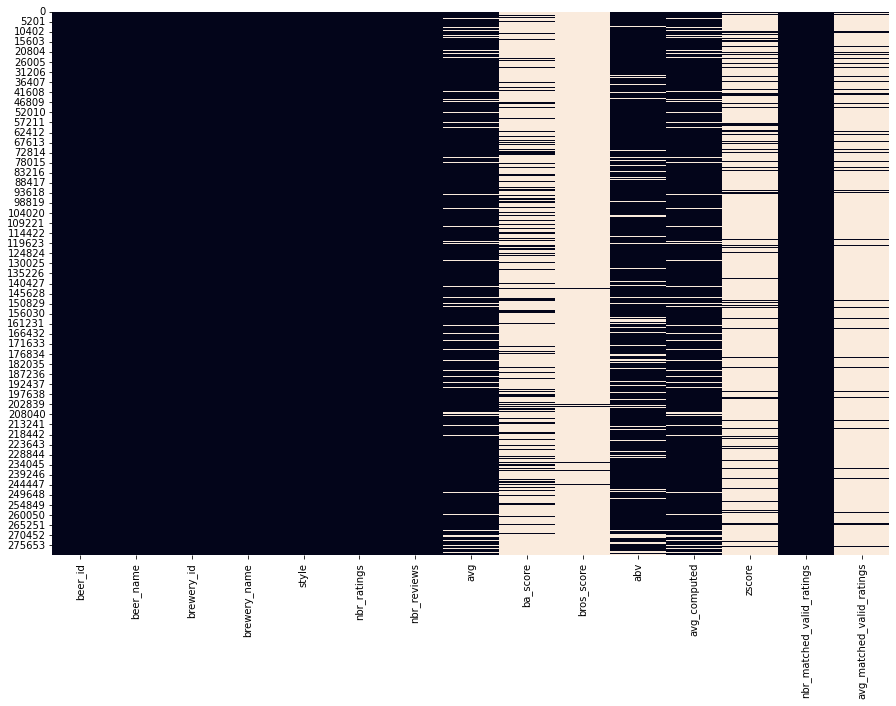

In [7]:
# show in white the nan values in a column
plt.figure(figsize=(15,10))
sns.heatmap(df_adv_beer.isna(), cbar=False)

In [8]:
(df_adv_beer.isna().sum()/df_adv_beer.shape[0]).sort_values(ascending=True)

beer_id                      0.000000
beer_name                    0.000000
brewery_id                   0.000000
brewery_name                 0.000000
style                        0.000000
nbr_ratings                  0.000000
nbr_reviews                  0.000000
nbr_matched_valid_ratings    0.000000
avg                          0.116903
avg_computed                 0.116946
abv                          0.128280
ba_score                     0.782069
zscore                       0.856547
avg_matched_valid_ratings    0.899324
bros_score                   0.979695
dtype: float64

### Adv Breweries dataset

In [26]:
df_adv_breweries.head()

,id,location,name,nbr_beers
0,39912,Kyrgyzstan,Abdysh-Ata (Абдыш Ата),5
1,39913,Kyrgyzstan,Arpa (АРПА),1
2,39914,Kyrgyzstan,Bear Beer,4
3,39915,Kyrgyzstan,Blonder Pub,4
4,39916,Kyrgyzstan,Kellers Bier,2


In [9]:
df_adv_breweries.dtypes

id            int64
location     object
name         object
nbr_beers     int64
dtype: object

In [10]:
df_adv_breweries.isna().sum()/df_adv_breweries.shape[0]

id           0.0
location     0.0
name         0.0
nbr_beers    0.0
dtype: float64

### Adv User dataset

In [30]:
print(df_adv_users.shape)
df_adv_users.head()

(153704, 6)


,nbr_ratings,nbr_reviews,user_id,user_name,joined,location
0,7820,465,nmann08.184925,nmann08,1.199704e+09,"United States, Washington"
1,2521,2504,stjamesgate.163714,StJamesGate,1.191838e+09,"United States, New York"
2,1797,1143,mdagnew.19527,mdagnew,1.116410e+09,Northern Ireland
3,31,31,helloloser12345.10867,helloloser12345,1.101380e+09,Northern Ireland
4,604,604,cypressbob.3708,cypressbob,1.069326e+09,Northern Ireland


In [12]:
df_adv_users.dtypes

nbr_ratings      int64
nbr_reviews      int64
user_id         object
user_name       object
joined         float64
location        object
dtype: object

In [13]:
# nan percentage
df_adv_users.isna().sum()/df_adv_users.shape[0]

nbr_ratings    0.000000
nbr_reviews    0.000000
user_id        0.000000
user_name      0.000007
joined         0.017254
location       0.203502
dtype: float64

<AxesSubplot:>

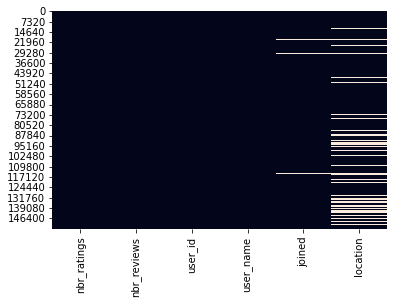

In [14]:
# nan heatmap
sns.heatmap(df_adv_users.isna(), cbar=False)

## Background Analysis
### Adv Beer

In [15]:
# Drop all columns with more than 78% of nan values

df_adv_beer = df_adv_beer[df_adv_beer.columns[df_adv_beer.isna().sum()/df_adv_beer.shape[0] < 0.78]]
df_adv_beer = df_adv_beer.drop('beer_id', axis=1)

In [16]:
df_adv_beer.head()

,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,abv,avg_computed,nbr_matched_valid_ratings
0,Nashe Moskovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,4.7,NaN,0
1,Nashe Pivovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,3.8,NaN,0
2,Nashe Shakhterskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,4.8,NaN,0
3,Nashe Zhigulevskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,4.0,NaN,0
4,Zhivoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,4.5,NaN,0


#### Continues variables

<Figure size 432x288 with 0 Axes>

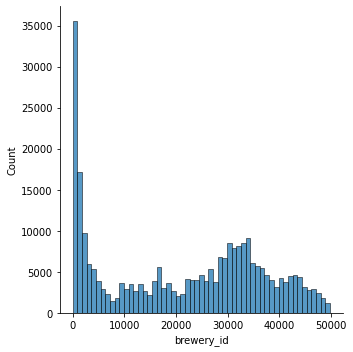

In [17]:
plt.figure()
sns.displot(df_adv_beer['brewery_id'])

<Figure size 432x288 with 0 Axes>

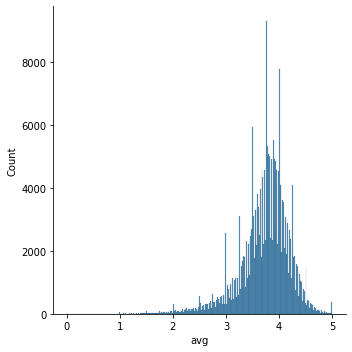

In [18]:
plt.figure()
sns.displot(df_adv_beer['avg'])

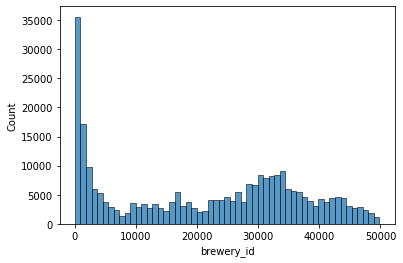

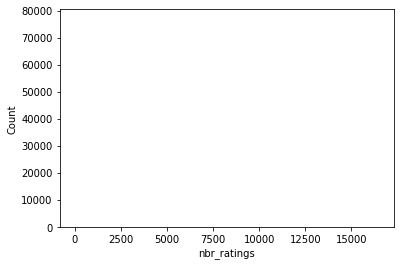

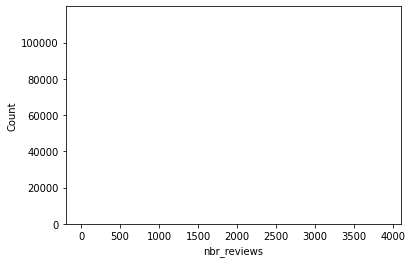

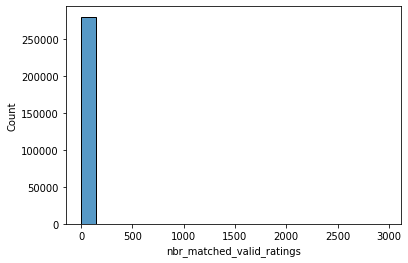

In [19]:
for col in df_adv_beer.select_dtypes('int64'):
    plt.figure()
    sns.histplot(df_adv_beer[col])

In [20]:
df_adv_beer['nbr_matched_valid_ratings'].value_counts()

0       252551
1        12117
2         4683
3         2485
4         1523
5         1027
6          765
7          608
8          485
9          360
10         325
11         286
12         250
13         214
14         169
17         160
16         152
15         149
18         121
19         111
20         100
22          91
23          89
21          79
24          77
26          61
28          60
27          58
29          55
25          54
34          54
33          47
30          46
31          44
36          42
35          33
37          32
44          32
32          32
39          31
41          30
38          23
56          23
47          23
42          22
40          22
54          21
48          21
59          20
46          20
64          19
49          17
45          17
50          17
53          16
52          16
43          16
67          16
65          14
57          14
58          13
60          13
70          12
72          12
55          11
63          11
86        

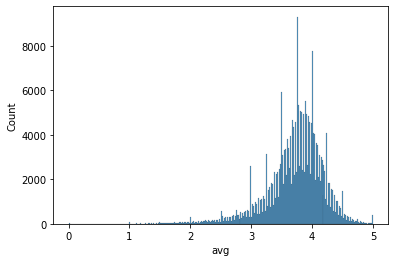

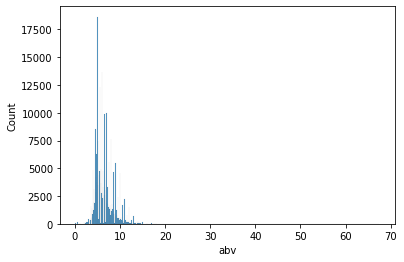

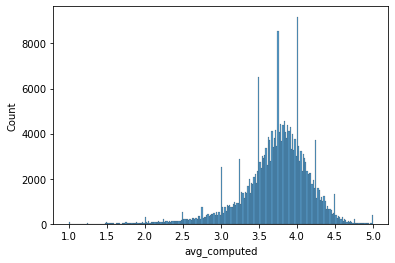

In [21]:
for col in df_adv_beer.select_dtypes('float'):
    plt.figure()
    sns.histplot(df_adv_beer[col])

In [22]:
df_adv_beer.dtypes

beer_name                     object
brewery_id                     int64
brewery_name                  object
style                         object
nbr_ratings                    int64
nbr_reviews                    int64
avg                          float64
abv                          float64
avg_computed                 float64
nbr_matched_valid_ratings      int64
dtype: object

#### Object variables

In [66]:
print('number of different beer name: ',df_adv_beer['beer_name'].nunique())
print('number of different brewery name: ',df_adv_beer['brewery_name'].nunique())
print('style beer unique value',df_adv_beer['style'].nunique())


number of different beer name:  236209
number of different brewery name:  14098
style beer unique value 104


In [56]:
beer_occurence = df_adv_beer['beer_name'].value_counts()
beer_occurence.shape
brewery_occurence = df_adv_beer['brewery_name'].value_counts()
brewery_occurence.shape
style_occurence = df_adv_beer['style'].value_counts()
style_occurence.shape

(104,)

In [57]:
intervals_list = ['> 10', '> 50','> 100 ', '> 500 ', '> 1000']
columns_name_list = {'intervals': [],
                             'number': []}

brewery_occurence_df = pd.DataFrame(columns_name_list)
style_occurence_df = pd.DataFrame(columns_name_list)
beer_occurence_df = pd.DataFrame(columns_name_list)
brewery_occurence_df.loc[:,'intervals'] = intervals_list
style_occurence_df.loc[:,'intervals'] = intervals_list
beer_occurence_df.loc[:,'intervals'] = intervals_list

In [58]:
beer_occurence_df.iloc[0,1] = beer_occurence[beer_occurence > 10].count()
beer_occurence_df.iloc[1,1] = beer_occurence[beer_occurence > 50].count()
beer_occurence_df.iloc[2,1] = beer_occurence[beer_occurence > 100].count()
beer_occurence_df.iloc[3,1] = beer_occurence[beer_occurence > 500].count()
beer_occurence_df.iloc[4,1] = beer_occurence[beer_occurence > 1000].count()
beer_occurence_df.head()

,intervals,number
0,> 10,548.0
1,> 50,97.0
2,> 100,47.0
3,> 500,3.0
4,> 1000,0.0


In [59]:
style_occurence_df.iloc[0,1] = style_occurence[style_occurence > 10].count()
style_occurence_df.iloc[1,1] = style_occurence[style_occurence > 50].count()
style_occurence_df.iloc[2,1] = style_occurence[style_occurence > 100].count()
style_occurence_df.iloc[3,1] = style_occurence[style_occurence > 500].count()
style_occurence_df.iloc[4,1] = style_occurence[style_occurence > 1000].count()
style_occurence_df.head()

,intervals,number
0,> 10,104.0
1,> 50,103.0
2,> 100,101.0
3,> 500,88.0
4,> 1000,70.0


In [60]:
brewery_occurence_df.iloc[0,1] = brewery_occurence[brewery_occurence > 10].count()
brewery_occurence_df.iloc[1,1] = brewery_occurence[brewery_occurence > 50].count()
brewery_occurence_df.iloc[2,1] = brewery_occurence[brewery_occurence > 100].count()
brewery_occurence_df.iloc[3,1] = brewery_occurence[brewery_occurence > 500].count()
brewery_occurence_df.iloc[4,1] = brewery_occurence[brewery_occurence > 1000].count()
brewery_occurence_df.head()

,intervals,number
0,> 10,6011.0
1,> 50,1254.0
2,> 100,450.0
3,> 500,11.0
4,> 1000,1.0


In [23]:
for col in df_adv_beer.select_dtypes('object'):
    print(f'{col:-<50} {df_adv_beer[col].unique()}')
    print('\n')

beer_name----------------------------------------- ['Nashe Moskovskoe' 'Nashe Pivovskoe' 'Nashe Shakhterskoe' ...
 "Witch's Hair Pumpkin Ale With Graham Crackers" 'Diamond Stout'
 'Irvington Pale Ale']


brewery_name-------------------------------------- ['Abdysh-Ata (Абдыш Ата)' 'Arpa (АРПА)' 'Bear Beer' ...
 'Alt Platz Brewing Company LLC' 'Twisted Manzanita Ales'
 'Summit Station Restaurant & Brewery']


style--------------------------------------------- ['Euro Pale Lager' 'American Pale Lager' 'Euro Dark Lager'
 'Foreign / Export Stout' 'Irish Red Ale' 'Czech Pilsener' 'Kölsch'
 'Dortmunder / Export Lager' 'Munich Dunkel Lager' 'Märzen / Oktoberfest'
 'English Pale Ale' 'English Bitter' 'American Pale Wheat Ale'
 'American Blonde Ale' 'English India Pale Ale (IPA)' 'Irish Dry Stout'
 'American Stout' 'American Pale Ale (APA)' 'Milk / Sweet Stout'
 'American Double / Imperial IPA' 'German Pilsener' 'American IPA'
 'Witbier' 'Munich Helles Lager' 'English Brown Ale' 'English Porter'


### Adv Brewery  

In [61]:
df_adv_breweries.head()

,id,location,name,nbr_beers
0,39912,Kyrgyzstan,Abdysh-Ata (Абдыш Ата),5
1,39913,Kyrgyzstan,Arpa (АРПА),1
2,39914,Kyrgyzstan,Bear Beer,4
3,39915,Kyrgyzstan,Blonder Pub,4
4,39916,Kyrgyzstan,Kellers Bier,2


In [63]:
df_adv_breweries['location'].unique()

# need to clean the location - delete http

array(['Kyrgyzstan', 'Gabon', 'Northern Ireland', 'Wales', 'Scotland',
       'England', 'Singapore', 'China', 'Chad', 'Saint Lucia', 'Cameroon',
       'Burkina Faso', 'Zambia', 'Romania', 'Nigeria', 'South Korea',
       'Georgia', 'Hong Kong', 'Guinea', 'Montenegro', 'Benin', 'Mexico',
       'Fiji Islands', 'Guam', 'Laos', 'Senegal', 'Honduras', 'Morocco',
       'Indonesia', 'Monaco', 'Ukraine', 'Canada', 'Jordan', 'Portugal',
       'Guernsey', 'India', 'Puerto Rico', 'Japan', 'Iran', 'Hungary',
       'Bulgaria', 'Guinea-Bissau', 'Liberia', 'Togo', 'Niger', 'Croatia',
       'Lithuania', 'Cyprus', 'Italy', 'Andorra', 'Botswana',
       'Turks and Caicos Islands', 'Papua New Guinea', 'Mongolia',
       'Ethiopia', 'Denmark', 'French Polynesia', 'Greece', 'Sri Lanka',
       'Syria', 'Germany', 'Jersey', 'Armenia', 'Mozambique', 'Palestine',
       'Bangladesh', 'Turkmenistan', 'Reunion', 'Eritrea', 'Switzerland',
       'Malta', 'Israel', 'El Salvador', 'French Guiana', 'Tonga',


In [81]:
print('brewery with 0 beer :( ', (df_adv_breweries['nbr_beers'] == 0).sum())
print('brewery with more than 10 beer', (df_adv_breweries['nbr_beers'] > 10).sum())
print('brewery with more than 100 beer', (df_adv_breweries['nbr_beers'] > 100).sum())
print('brewery with more than 500 beer', (df_adv_breweries['nbr_beers'] > 500).sum())
print('brewery with more than 1000 beer', (df_adv_breweries['nbr_beers'] > 1000).sum())

brewery with 0 beer :(  2236
brewery with more than 10 beer 6270
brewery with more than 100 beer 583
brewery with more than 500 beer 59
brewery with more than 1000 beer 33


### Adv User

In [82]:
df_adv_users.head()

,nbr_ratings,nbr_reviews,user_id,user_name,joined,location
0,7820,465,nmann08.184925,nmann08,1.199704e+09,"United States, Washington"
1,2521,2504,stjamesgate.163714,StJamesGate,1.191838e+09,"United States, New York"
2,1797,1143,mdagnew.19527,mdagnew,1.116410e+09,Northern Ireland
3,31,31,helloloser12345.10867,helloloser12345,1.101380e+09,Northern Ireland
4,604,604,cypressbob.3708,cypressbob,1.069326e+09,Northern Ireland


In [84]:
df_adv_users['location'].nunique()
# 
# we need to count the number of user per location to see
#

194

In [88]:
print('user with more than 10 review', (df_adv_users['nbr_reviews'] > 10).sum())
print('user with more than 100 review', (df_adv_users['nbr_reviews'] > 100).sum())
print('user with more than 500 review', (df_adv_users['nbr_reviews'] > 500).sum())
print('user with more than 1000 review', (df_adv_users['nbr_reviews'] > 1000).sum())


user with more than 10 review 15017
user with more than 100 review 4332
user with more than 500 review 1125
user with more than 1000 review 488


In [90]:
print('user with more than 10 ratings', (df_adv_users['nbr_ratings'] > 10).sum())
print('user with more than 100 ratings', (df_adv_users['nbr_ratings'] > 100).sum())
print('user with more than 500 ratings', (df_adv_users['nbr_ratings'] > 500).sum())
print('user with more than 1000 ratings', (df_adv_users['nbr_ratings'] > 1000).sum())

user with more than 10 ratings 46404
user with more than 100 ratings 14387
user with more than 500 ratings 3826
user with more than 1000 ratings 1607
